## Supplementary Figure 6. Identification of SV genes in replicate 9 of MOB data by scGCO.

In [1]:
from scGCO import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
ii = 9
unary_scale_factor=100
label_cost=10
algorithm='expansion'
ff = '../../data/Raw_data/MOB-breast-cancer/Rep' + str(ii) +  '_MOB_count_matrix-1.tsv'

locs,data=read_spatial_expression(ff,sep='\t')
data_norm = normalize_count_cellranger(data)

raw data dim: (237, 15284)


In [3]:
known_gene=['Apod', 'Apold1', 'Beta-s', 'Calb2', 'Camk4', 'Cck', 'Cdhr1',
 'Doc2g', 'Eomes', 'Fabp7', 'Gabra1', 'Gad1', 'Gsn', 'Kcnj4',
 'Kctd12', 'Map2k1', 'Nmb', 'Nr2f2', 'Nrgn', 'Nrsn1', 'Pcp4',
 'Penk', 'Plcxd2', 'Ptgds', 'Ptn', 'Rbfox3', 'Rcan2', 'Reln', 'S100a5', 'S100b',
 'Shisa3', 'Slc17a7', 'Slc6a11', 'Stxbp6', 'Sv2b', 'Th', 'Uchl1',"Id3","Psd3"]
len(known_gene)

39

# read saved results

In [4]:
image=("../../data/Raw_data/HE-MOB-breast-cancer/HE_Rep9_MOB.jpg")

In [5]:
version="new"
if version=="new":
    fileName="../../data/MouseOB/scGCO_results/Rep" +str(ii) + "_result_df.csv"
    result_df=read_result_to_dataframe(fileName)
    
    fileName="../../data/MouseOB/scGCO_results/Rep" + str(ii) + "_pattern_df.csv"
    pattern_conserved_df=read_result_to_dataframe(fileName)
    
    fileName="../../data/MouseOB/scGCO_results/Rep" + str(ii) + "_final_df.csv"
    pattern_conserved_df_exp=read_result_to_dataframe(fileName)

In [6]:
pattern_conserved_df_exp.shape

(232, 241)

(232, 2)


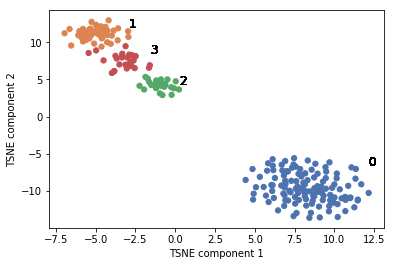

In [7]:
gene_lists=pattern_conserved_df_exp.index
marker_genes=["Penk","Kctd12","Doc2g","Glul"]
fileName="../../figures//Suppl_Fig6a_Rep{}_MOB_tsne_kmeans_genes_cluster.pdf".format(ii,ii)
tsne_proj_gene_df=spatial_pca_tsne_kmeans_cluster_gene(data_norm,gene_lists,marker_genes,perplexity=40,fileName=fileName)

[ 67.  47. 120.]


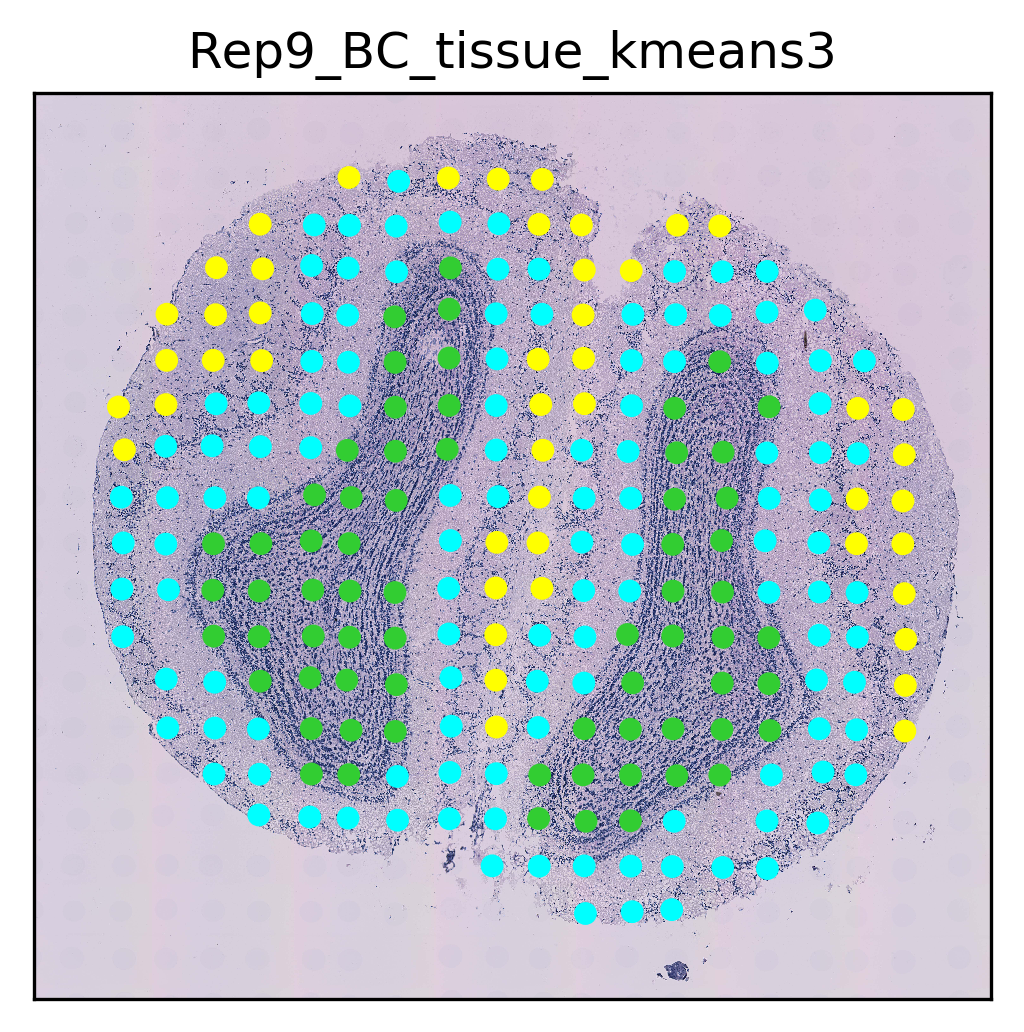

In [8]:
# compare the three sets of predictions to tissue structure
# step 1
# create three vects for tissue structure

cluster_gene=pattern_conserved_df_exp.index
exp =  data_norm.iloc[:,1]
exp=(log1p(exp)).values
cellGraph = create_graph_with_weight(locs, exp) 
X=log1p(data_norm.loc[:, cluster_gene])
kmeans=KMeans(n_clusters=3,random_state=0).fit(X)
hmrf_tissue3_labels = cut_graph_profile(cellGraph, kmeans.labels_, unary_scale_factor=100, 
                      smooth_factor=10)

uniq_tissue3, count_tissue3 = np.unique(hmrf_tissue3_labels, return_counts = True)
tissue3_mat_list = list()
for tm_index in np.arange(len(uniq_tissue3)):
    temp_vec = np.zeros(hmrf_tissue3_labels.shape[0])
    temp_vec[np.where(hmrf_tissue3_labels == uniq_tissue3[tm_index])[0]] = 1       
    tissue3_mat_list.append(temp_vec)
tissue3_mat = np.array(tissue3_mat_list)
print(np.sum(tissue3_mat, axis=1))

fig,ax=plt.subplots(dpi=300)
add_HE_image(image,ax)
colors = ["limegreen","yellow","cyan"]

ax.scatter(locs[:,0], locs[:,1], c=kmeans.labels_, cmap=matplotlib.colors.ListedColormap(colors),s=20)

points=locs
p_dist = cdist(points, points)    
p_dist[p_dist == 0] = np.max(p_dist, axis = 0)[0]
norm_dist = np.mean(np.min(p_dist, axis = 0))

# find points at edge, add three layers of new points 
x_min = np.min(points, axis = 0)[0] - 3*norm_dist
y_min = np.min(points, axis = 0)[1] - 3*norm_dist
x_max = np.max(points, axis = 0)[0] + 3*norm_dist
y_max = np.max(points, axis = 0)[1] + 3*norm_dist

ax.set_xlim(x_min + norm_dist, x_max - norm_dist)
ax.set_ylim(y_min + norm_dist, y_max - norm_dist)
ax.set_title('Rep9_BC_tissue_kmeans3')
ax.set_yticks([])
ax.set_xticks([])
plt.show()

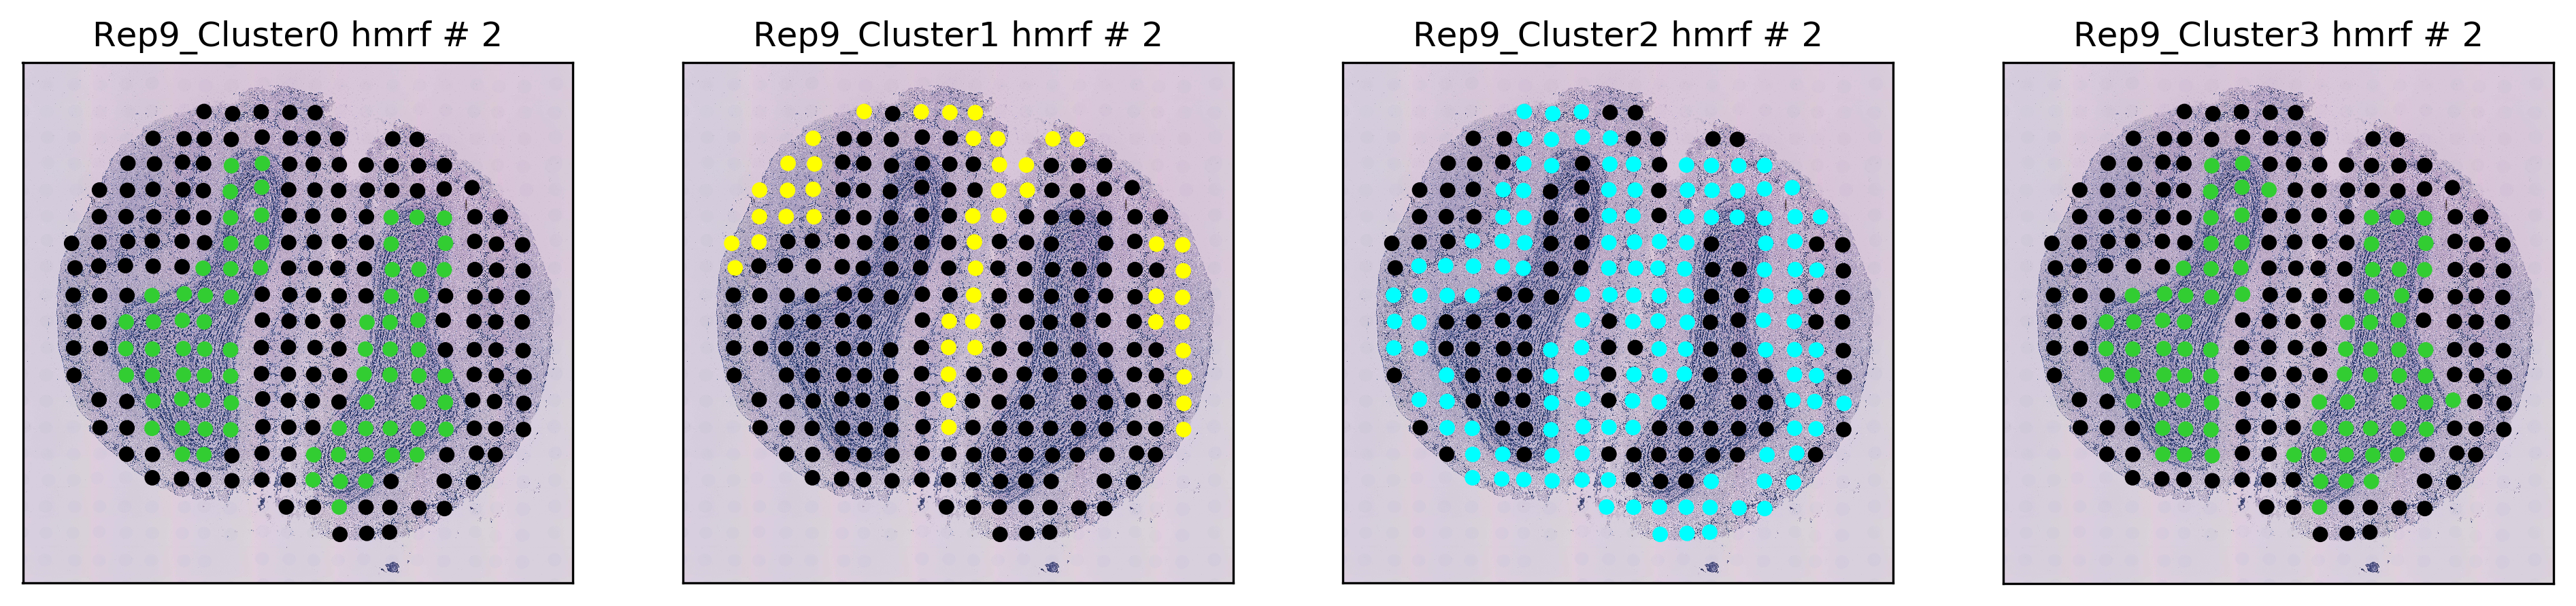

In [9]:
ncows=len(tsne_proj_gene_df["cluster"].unique())
fig,ax=plt.subplots(1,ncows,figsize=(ncows*4,1*4),dpi=300)
for (uu, group) in tsne_proj_gene_df.groupby("cluster"):
        gene_subset =group.index
        
        X=log1p(data_norm.loc[:,gene_subset])
        kmeans=KMeans(n_clusters=2,random_state=0).fit(X)
        hmrf_labels = cut_graph_profile(cellGraph, kmeans.labels_, unary_scale_factor=100, 
                       smooth_factor=35)
        #colors=match_colors_to_tissues_new(tissue3_mat,hmrf_labels)
        #colors=["red","green"]
        if uu==0:
            colors=["k","limegreen"]
        elif uu==1:
            colors=["k","yellow"]
        elif uu==2:
            colors=["k","cyan"]
        elif uu==3:
            colors=["k","limegreen"]
        add_HE_image(image,ax[uu])
        ax[uu].scatter(locs[:,0], locs[:,1], c=hmrf_labels, cmap=matplotlib.colors.ListedColormap(colors),s=20)
    
        points=locs
        p_dist = cdist(points, points)    
        p_dist[p_dist == 0] = np.max(p_dist, axis = 0)[0]
        norm_dist = np.mean(np.min(p_dist, axis = 0))

# find points at edge, add three layers of new points 
        x_min = np.min(points, axis = 0)[0] - 3*norm_dist
        y_min = np.min(points, axis = 0)[1] - 3*norm_dist
        x_max = np.max(points, axis = 0)[0] + 3*norm_dist
        y_max = np.max(points, axis = 0)[1] + 3*norm_dist

        ax[uu].set_xlim(x_min + norm_dist, x_max - norm_dist)
        ax[uu].set_ylim(y_min + norm_dist, y_max - norm_dist)
        #ax[uu].set_title(texttitle)
        ax[uu].set_title("Rep"+ str(ii) + "_Cluster"+str(uu)+' hmrf # 2')
        ax[uu].set_yticks([])
        ax[uu].set_xticks([])
fig.savefig("../../figures//Suppl_Figure6b_Rep{}_MOB_tsne_genes_kmeans_2.pdf".format(ii,ii),format="pdf",dpi=300)

In [10]:
fig,ax=plt.subplots(8,6,dpi=300,gridspec_kw={"height_ratios":[1,1.2,1,1.2,1,1.2,1,1.2]},figsize=(10,15))
#fig,ax=plt.subplots(8,6,dpi=600,figsize=(15,30))

# fig.subplots_adjust(hspace=0.3, wspace=0.3,
#                             top=0.925, right=0.925, bottom=0.075, left = 0.075)

tsne0_genes=["Nrgn","Penk","Pcp4","Map2k1","Mapk1","Ube2ql1"]
for i ,geneID in enumerate(tsne0_genes):
    smooth_factor=result_df.loc[geneID,"smooth_factor"]
    exp =  data_norm.loc[:,geneID]
    exp=(log1p(exp)).values
    newLabels = result_df.loc[geneID][7:]
    p=result_df.loc[geneID,"p_value"]
    axes=ax[0][i]
    subplot_voronoi_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0)
    axes.set_title(geneID, fontname="Arial", fontsize=12)
    axes.set_xticks([])
    axes.set_yticks([])
    axes=ax[1][i]
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0,line_alpha=0)
    axes.set_title("")
    axes.set_yticks([])
    axes.set_xticks([])

tsne1_genes=["Kcna2","Reln","Cck","Doc2g","Slc17a7","Map1b"]
for i ,geneID in enumerate(tsne1_genes):
    smooth_factor=result_df.loc[geneID,"smooth_factor"]
    exp =  data_norm.loc[:,geneID]
    exp=(log1p(exp)).values
    newLabels = result_df.loc[geneID][7:]
    p=result_df.loc[geneID,"p_value"]
    axes=ax[2][i]
    subplot_voronoi_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0)
    axes.set_title(geneID, fontname="Arial", fontsize=12)
    axes.set_xticks([])
    axes.set_yticks([])
    axes=ax[3][i]
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0,line_alpha=0)
    axes.set_title("")
    axes.set_yticks([])
    axes.set_xticks([])

tsne2_genes=["Fabp7","Kctd12","Apod","Gng13","Gsn","Scd1"]
for i ,geneID in enumerate(tsne2_genes):
    smooth_factor=result_df.loc[geneID,"smooth_factor"]
    exp =  data_norm.loc[:,geneID]
    exp=(log1p(exp)).values
    newLabels = result_df.loc[geneID][7:]
    axes=ax[4][i]
    subplot_voronoi_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0)
    axes.set_title(geneID, fontname="Arial", fontsize=12)
    axes.set_xticks([])
    axes.set_yticks([])
    axes=ax[5][i]
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0,line_alpha=0)
    axes.set_title("")
    axes.set_yticks([])
    axes.set_xticks([])

tsne3_genes=["Sparcl1","Gstm1","Serpine2","Glul","Gpm6b","Nrsn1"]
for i ,geneID in enumerate(tsne3_genes):
    smooth_factor=result_df.loc[geneID,"smooth_factor"]
    exp =  data_norm.loc[:,geneID]
    exp=(log1p(exp)).values
    newLabels = result_df.loc[geneID][7:]
    p=result_df.loc[geneID,"p_value"]
    axes=ax[6][i]
    subplot_voronoi_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0)
    axes.set_title(geneID, fontname="Arial", fontsize=12)
    axes.set_xticks([])
    axes.set_yticks([])
    axes=ax[7][i]
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,min(p),axes,class_line_width=2,point_size=0,line_alpha=0)
    axes.set_title("")
    axes.set_yticks([])
    axes.set_xticks([])
fig.savefig("../../figures//Suppl_Figure6cdef_Rep{}_MOB_tsne_maker_genes_FigR4d.pdf".format(ii,ii),format="pdf",dpi=300)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
